# CellChat 

Reference
Github: https://github.com/sqjin/CellChat
<br>
Paper: https://www.nature.com/articles/s41467-021-21246-9

In [1]:
# installation
devtools::install_github("sqjin/CellChat")

statnet.c... (NA           -> 4.5.0       ) [CRAN]
stringi      (1.6.2        -> 1.7.5       ) [CRAN]
network      (NA           -> 1.17.1      ) [CRAN]
shape        (1.4.5        -> 1.4.6       ) [CRAN]
systemfonts  (1.0.2        -> 1.0.3       ) [CRAN]
rngtools     (1.5          -> 1.5.2       ) [CRAN]
sna          (NA           -> 2.6         ) [CRAN]
ComplexHe... (649763b09... -> 5c6415bac...) [GitHub]
circlize     (0.4.12       -> 0.4.13      ) [CRAN]
ggalluvial   (NA           -> 0.12.3      ) [CRAN]
igraph       (1.2.6        -> 1.2.8       ) [CRAN]


Skipping 2 packages not available: Biobase, BiocGenerics

Installing 10 packages: statnet.common, stringi, network, shape, systemfonts, rngtools, sna, circlize, ggalluvial, igraph

Installing packages into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘stringi’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘igraph’ had non-zero exit status”



clue (0.3-59 -> 0.3-60) [CRAN]


Installing 1 packages: clue

Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmporQ9d5/remotes1b9ce44692942/jokergoo-ComplexHeatmap-5c6415b/DESCRIPTION’
─  preparing ‘ComplexHeatmap’: (2.9s)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (2.1s)
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.11.1.tar.gz’
   


Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmporQ9d5/remotes1b9ce6861d155/sqjin-CellChat-c7e673d/DESCRIPTION’
─  preparing ‘CellChat’: (1.3s)
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts (688ms)
─  checking for empty or unneeded directories
─  building ‘CellChat_1.1.3.tar.gz’
   


Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [3]:
# load the necessary packages
install.packages('NMF')
devtools::install_github("jokergoo/circlize")
devtools::install_github("jokergoo/ComplexHeatmap")

Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)





✔  checking for file ‘/tmp/RtmporQ9d5/remotes1b9cea45f684/jokergoo-circlize-14116da/DESCRIPTION’ (412ms)
─  preparing ‘circlize’: (1.9s)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (1.5s)
─  checking for empty or unneeded directories
   Removed empty directory ‘circlize/example’
   Removed empty directory ‘circlize/test’
─  building ‘circlize_0.4.14.tar.gz’
   


Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Skipping install of 'ComplexHeatmap' from a github remote, the SHA1 (5c6415ba) has not changed since last install.
  Use `force = TRUE` to force installation



## Generate a seurat object with normalized values

In [50]:
# Libraries
suppressPackageStartupMessages({
    library(Seurat)
    library(patchwork)
    library(dplyr)
    library(ggplot2)
    library(sctransform)
    library(CellChat)
})

In [29]:
pbmc.data <- Read10X(data.dir = "data/filtered_gene_bc_matrices/hg19/")
pbmc <- CreateSeuratObject(counts = pbmc.data)
pbmc

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
32738 features across 2700 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)

In [30]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

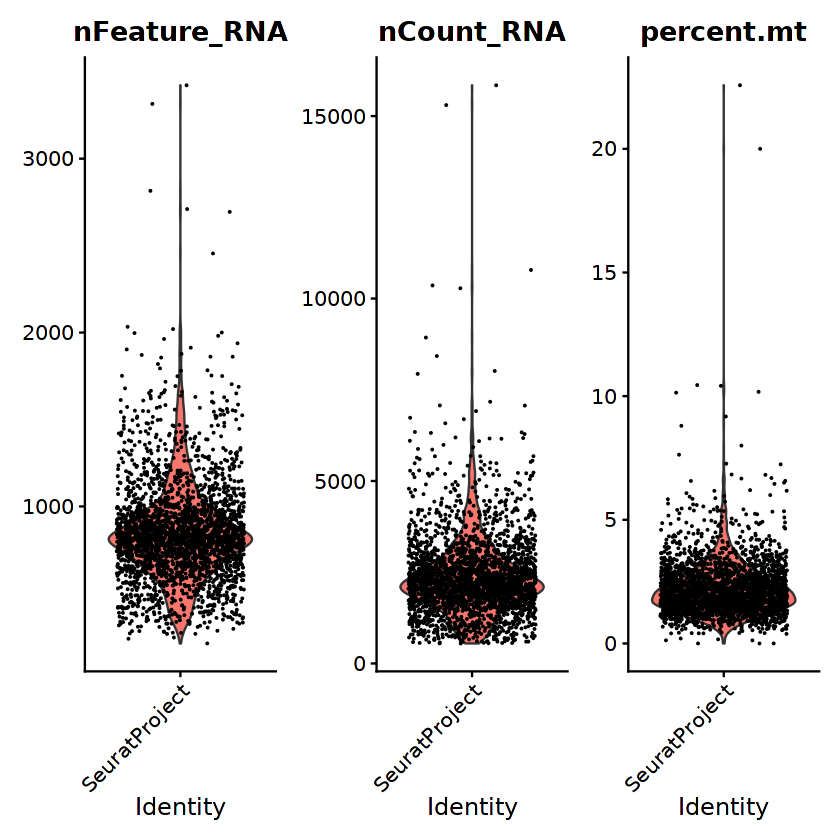

In [32]:
# We filter cells that have >5% mitochondrial counts
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

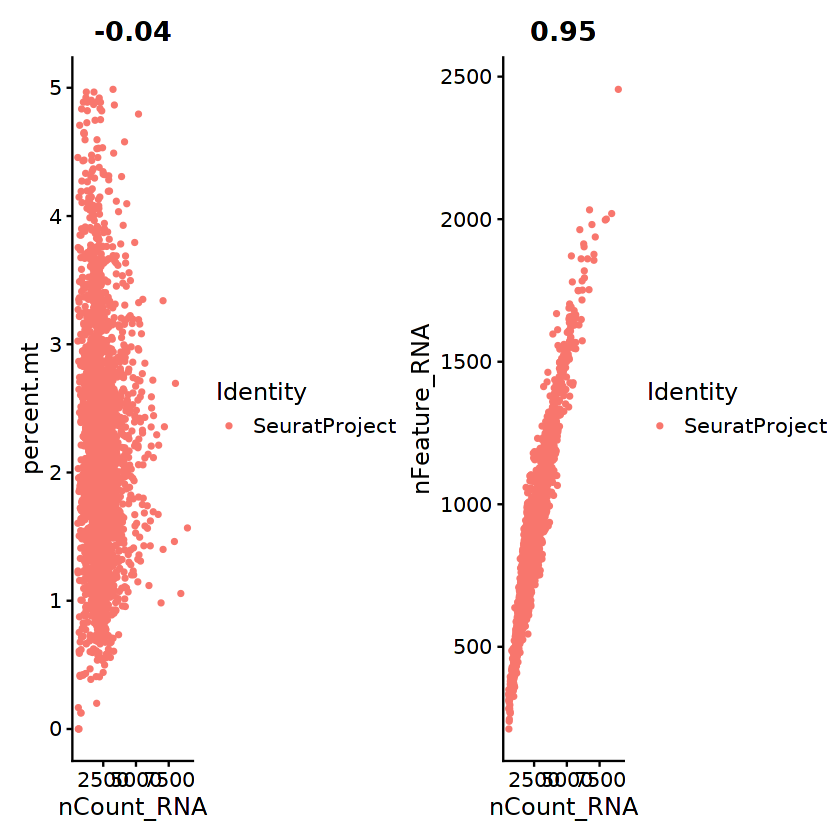

In [43]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [34]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

In [35]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [37]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16159 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16159 rows containing missing values (geom_point).”


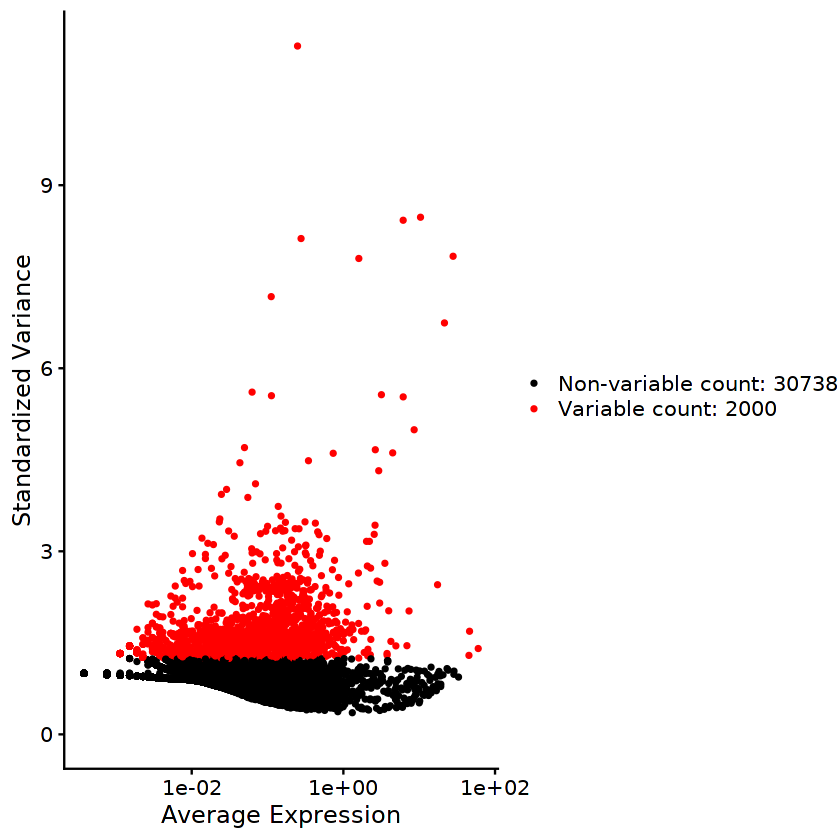

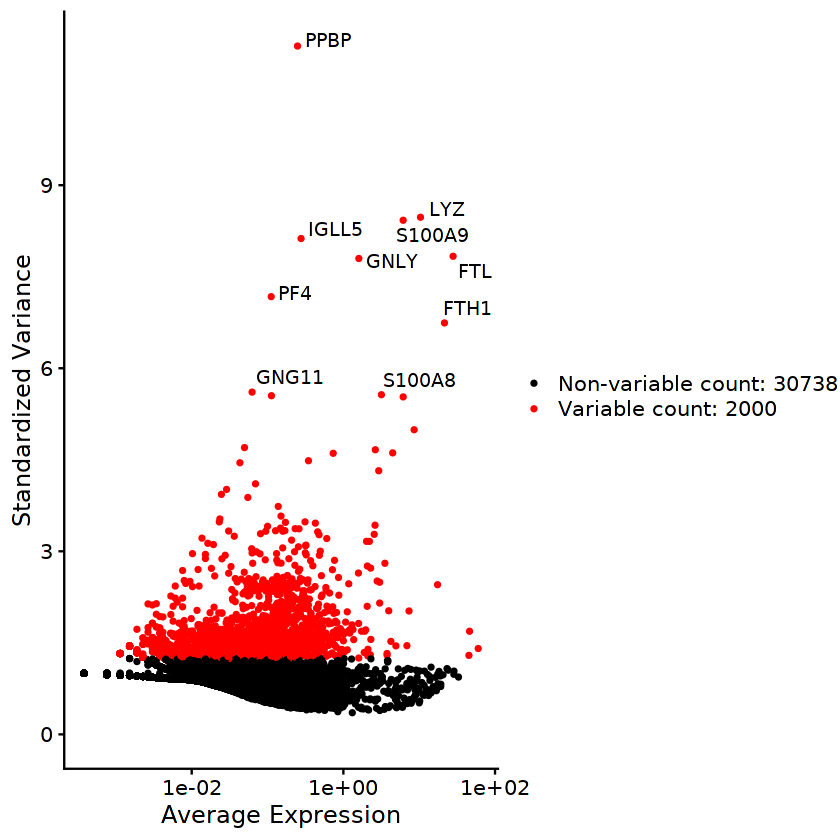

In [53]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

options(repr.plots.width = 6, repr.plots.height = 6)
plot1 

plot2

In [54]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



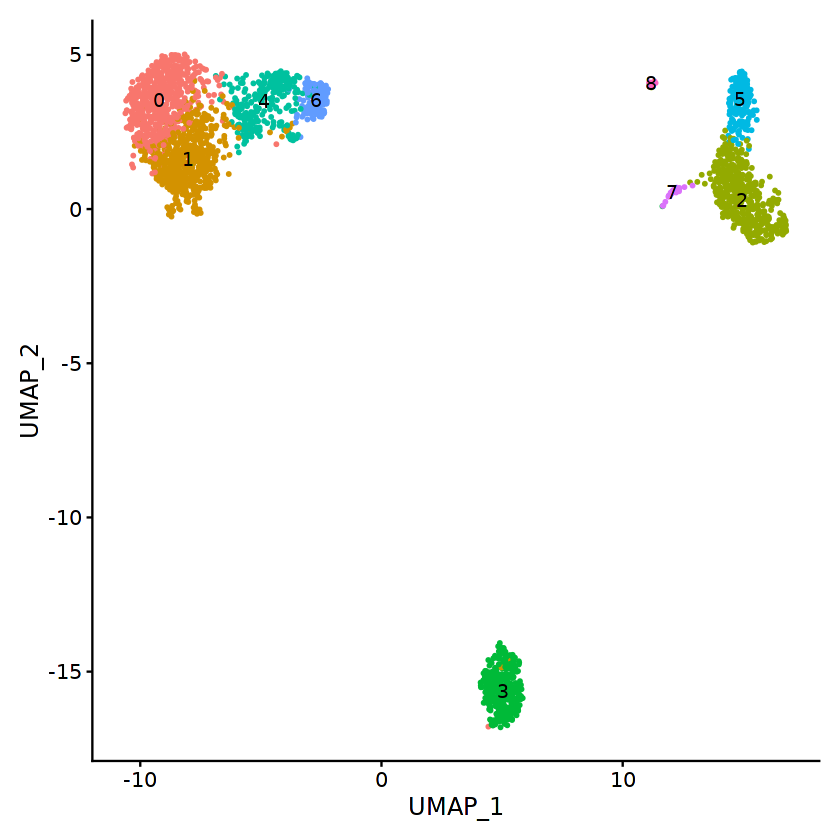

In [55]:
# These are now standard steps in the Seurat workflow for visualization and clustering
pbmc <- RunPCA(pbmc, verbose = FALSE)
pbmc <- RunUMAP(pbmc, dims = 1:30, verbose = FALSE)

pbmc <- FindNeighbors(pbmc, dims = 1:30, verbose = FALSE)
pbmc <- FindClusters(pbmc, verbose = FALSE)


DimPlot(pbmc, label = TRUE) + NoLegend()

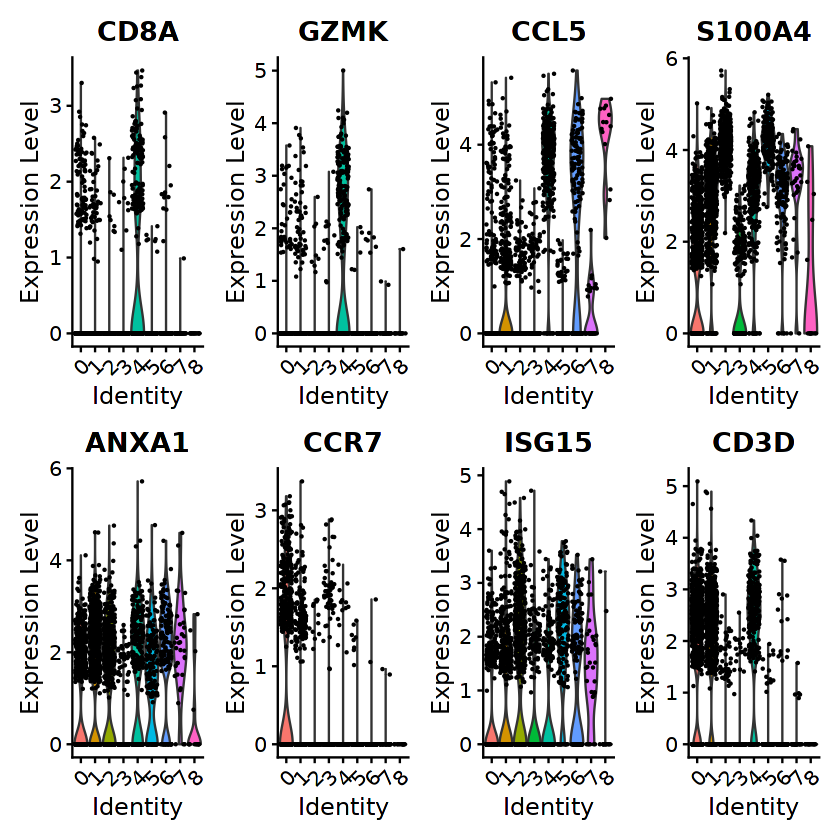

In [56]:
# These are now standard steps in the Seurat workflow for visualization and clustering
# Visualize canonical marker genes as violin plots.
VlnPlot(pbmc, features = c("CD8A", "GZMK", "CCL5", "S100A4", "ANXA1", "CCR7", "ISG15", "CD3D"),
    pt.size = 0.2, ncol = 4)

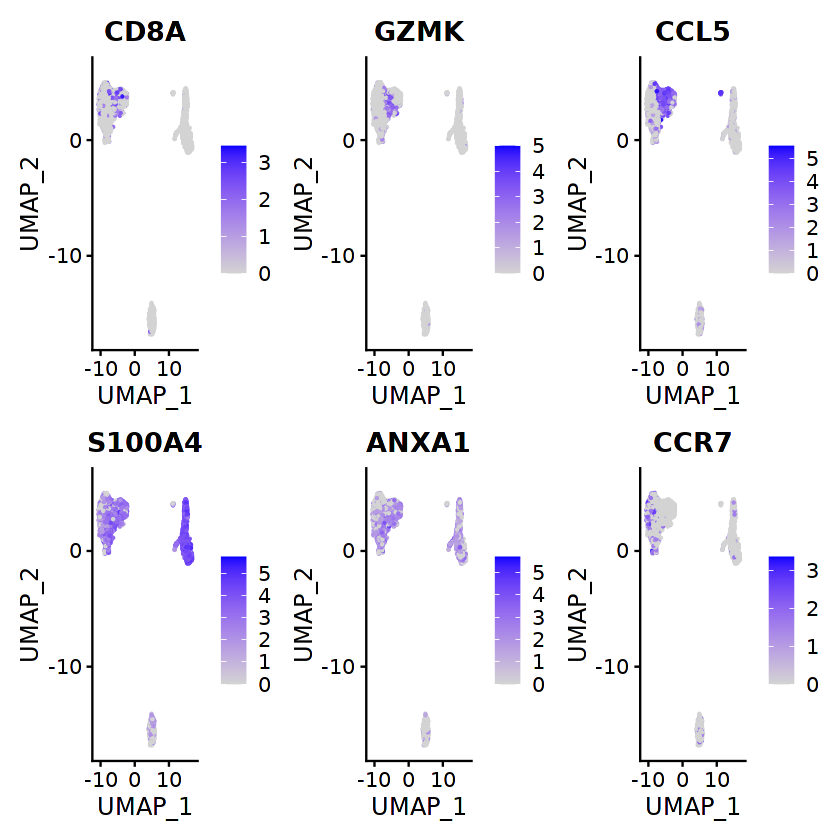

In [57]:
# Visualize canonical marker genes on the sctransform embedding.
FeaturePlot(pbmc, features = c("CD8A", "GZMK", "CCL5", "S100A4", "ANXA1", "CCR7"), pt.size = 0.2,
    ncol = 3)

In [13]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.017737e-95,0.7533227,0.951,0.591,1.279499e-91,0,LDHB
3.119715e-97,0.7181490,1.000,0.983,3.922106e-93,0,RPS3A
0.000000e+00,4.3920339,0.992,0.208,0.000000e+00,1,S100A9
3.686216e-277,3.9669171,1.000,0.532,4.634311e-273,1,LYZ
2.086907e-107,1.3294009,0.978,0.646,2.623659e-103,2,LTB
3.299574e-103,1.0361613,0.948,0.471,4.148224e-99,2,IL32
6.520104e-191,2.6152340,1.000,0.839,8.197075e-187,3,CD74
0.000000e+00,2.4113075,0.929,0.037,0.000000e+00,3,CD79A
2.549686e-139,2.0571390,0.964,0.243,3.205465e-135,4,CCL5


Warning message in DoHeatmap(pbmc, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: RPS25, RPL31”


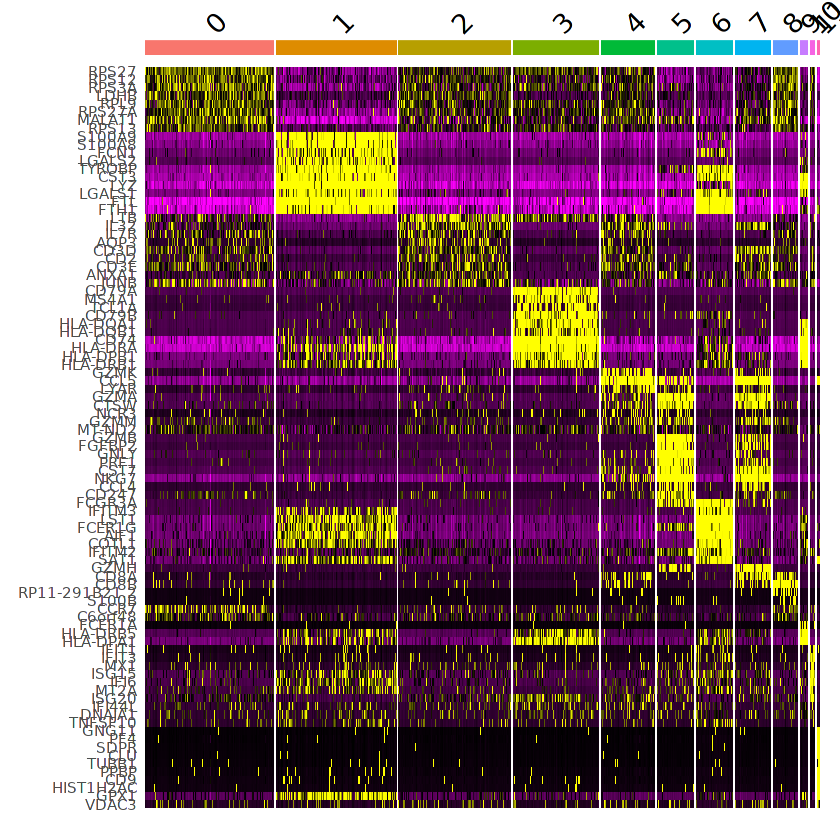

In [14]:
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
DoHeatmap(pbmc, features = top10$gene) + NoLegend()

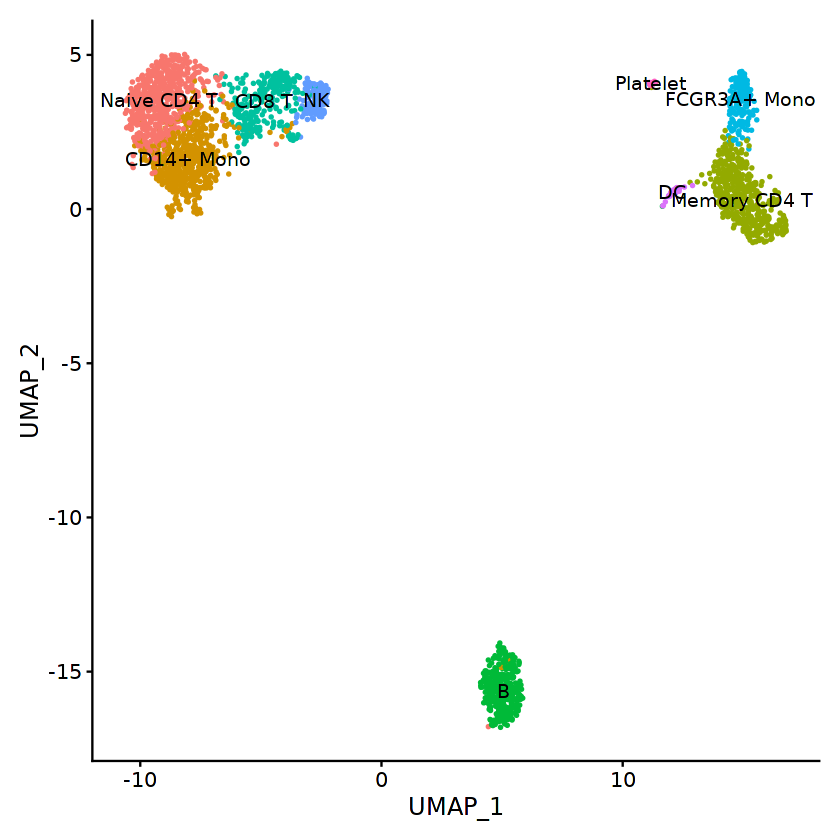

In [58]:
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

## CellChat pipeline starts here

#### Extract the CellChat input files from a Seurat V3 object

The normalized count data and cell group information can be obtained from the Seurat object by

In [59]:
data.input <- GetAssayData(pbmc, assay = "RNA", slot = "data") # normalized data matrix

labels <- Idents(pbmc)

meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels

#### Create a CellChat object using data matrix as input

In [60]:
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "group")

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  Naive CD4 T CD14+ Mono Memory CD4 T B CD8 T FCGR3A+ Mono NK DC Platelet 


In [62]:
cellchat <- addMeta(cellchat, meta = meta, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels") # set "labels" as default cell identity
levels(cellchat@idents) # show factor levels of the cell labels

[1] "Naive CD4 T"  "CD14+ Mono"   "Memory CD4 T" "B"            "CD8 T"       
[6] "FCGR3A+ Mono" "NK"           "DC"           "Platelet"

In [64]:
groupSize <- as.numeric(table(cellchat@idents)) # number of cells in each cell group

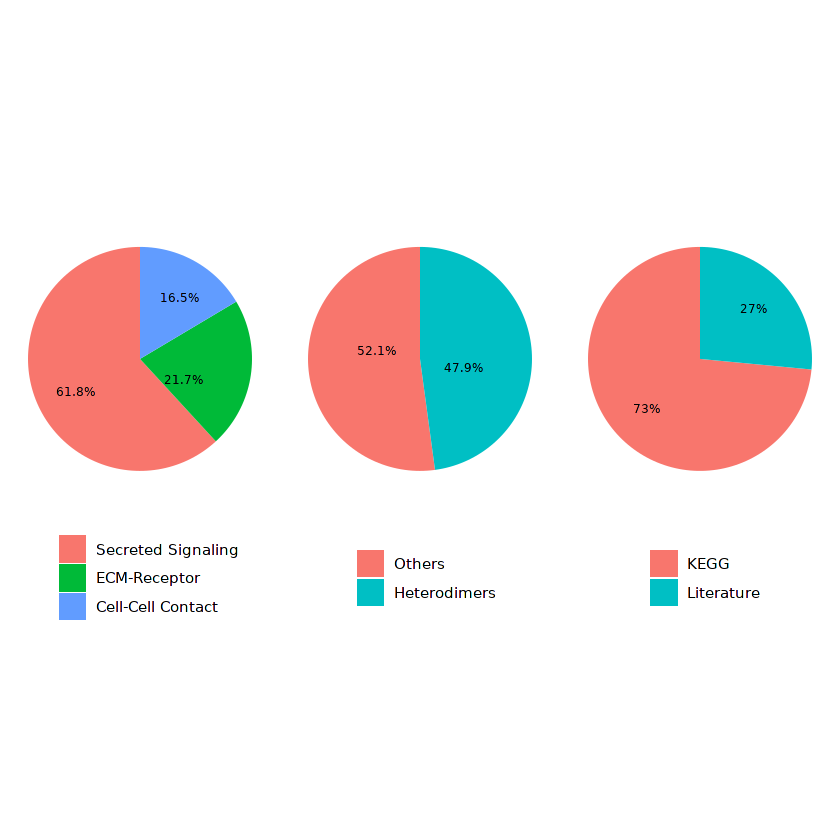

In [65]:
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)

In [66]:
# Show the structure of the database
dplyr::glimpse(CellChatDB$interaction)

Rows: 1,939
Columns: 11
$ interaction_name   <chr> "TGFB1_TGFBR1_TGFBR2", "TGFB2_TGFBR1_TGFBR2", "TGFB…
$ pathway_name       <chr> "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TGFb", "TG…
$ ligand             <chr> "TGFB1", "TGFB2", "TGFB3", "TGFB1", "TGFB1", "TGFB2…
$ receptor           <chr> "TGFbR1_R2", "TGFbR1_R2", "TGFbR1_R2", "ACVR1B_TGFb…
$ agonist            <chr> "TGFb agonist", "TGFb agonist", "TGFb agonist", "TG…
$ antagonist         <chr> "TGFb antagonist", "TGFb antagonist", "TGFb antagon…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "TGFb inhibition receptor", "TGFb inhibition recept…
$ evidence           <chr> "KEGG: hsa04350", "KEGG: hsa04350", "KEGG: hsa04350…
$ annotation         <chr> "Secreted Signaling", "Secreted Signaling", "Secret…
$ interaction_name_2 <chr> "TGFB1 - (TGFBR1+TGFBR2)", "TGFB2 - (TGFBR1+TGFBR2)…


In [67]:
# use a subset of CellChatDB for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling

In [ ]:
# use all CellChatDB for cell-cell communication analysis
# CellChatDB.use <- CellChatDB # simply use the default CellChatDB

In [68]:
# set the used database in the object
cellchat@DB <- CellChatDB.use

In [69]:
# subset the expression data of signaling genes for saving computation cost
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database
future::plan("multiprocess", workers = 4) # do parallel

Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


In [70]:
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
# project gene expression data onto PPI network (optional)
cellchat <- projectData(cellchat, PPI.human)

# Inference of cell-cell communication network

In [71]:
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [72]:
cellchat <- computeCommunProbPathway(cellchat)

In [73]:
cellchat <- aggregateNet(cellchat)


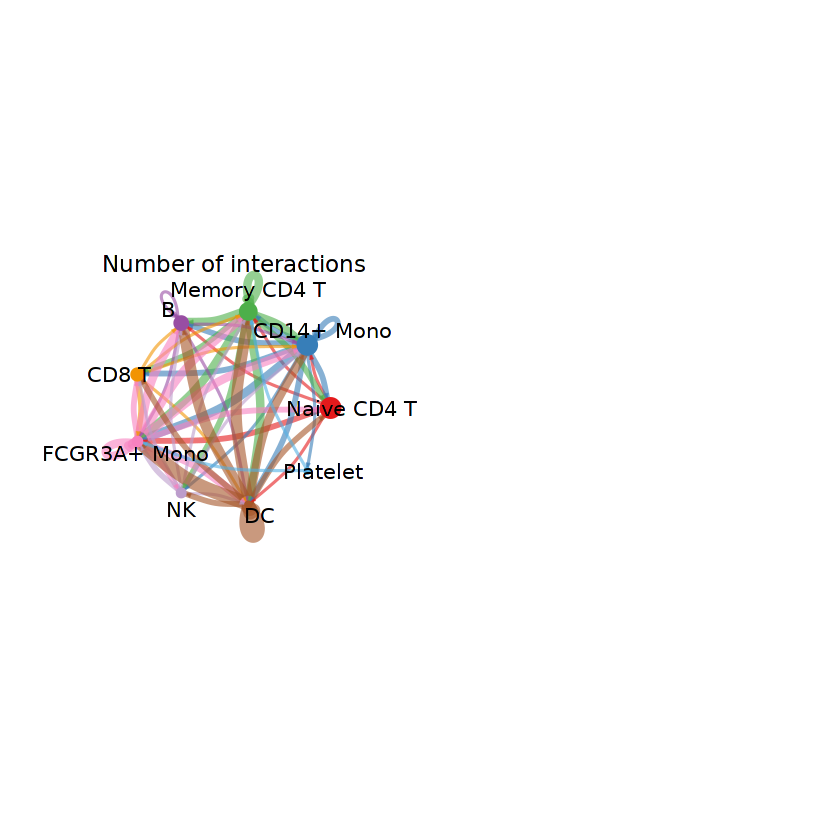

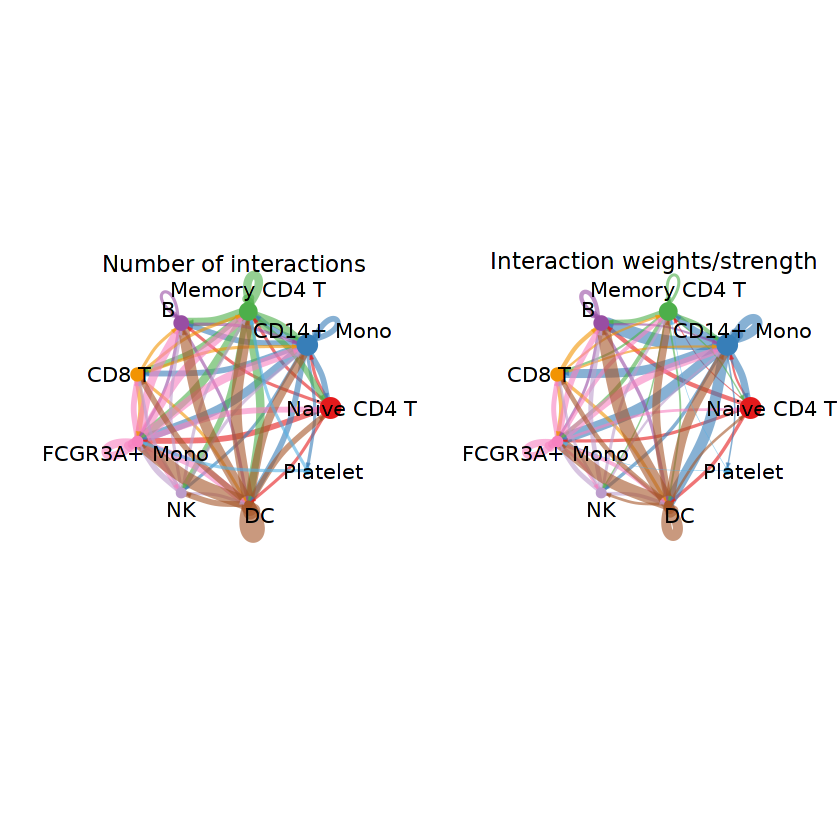

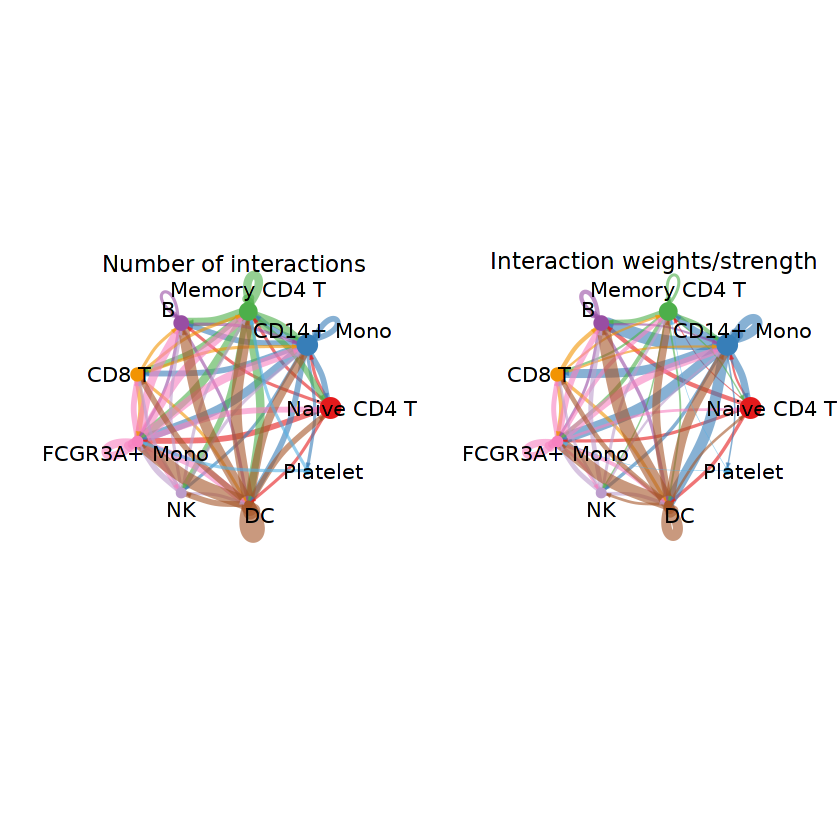

In [74]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

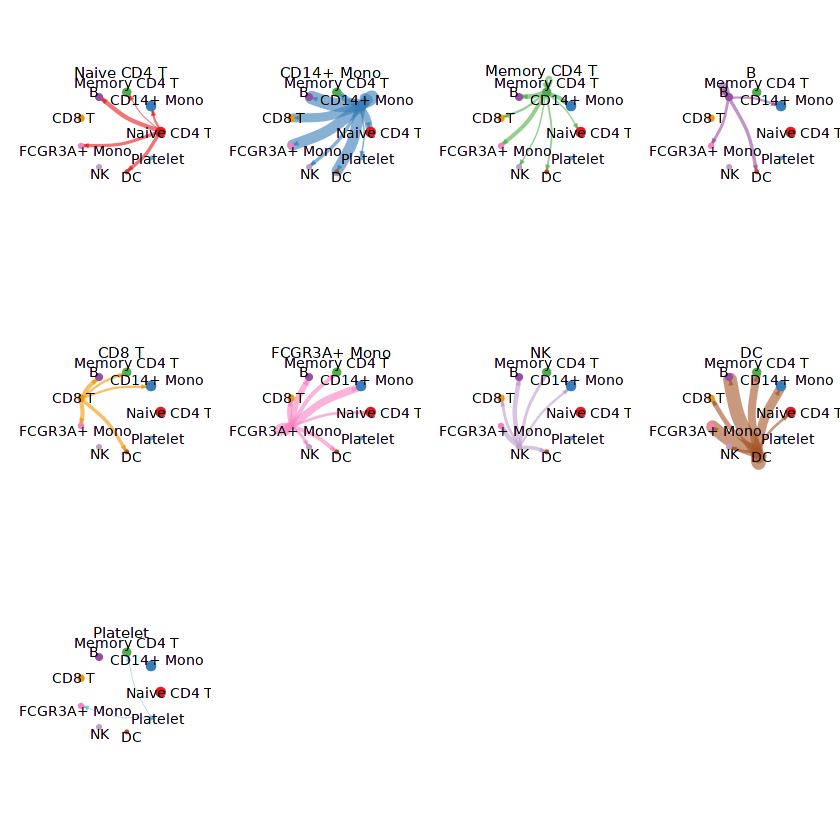

In [75]:
mat <- cellchat@net$weight
par(mfrow = c(3,4), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

In [78]:
pathways.show <- c("DC") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)

Cannot find  DC . Please input a correct name! 


ERROR: Error in ...future.FUN(...future.X_jj, ...): 
